In [ ]:
#loading the data
from keras.datasets import mnist
(train_images, train_lablels), (test_images, test_labels) = mnist.load_data()
print(f"Training data shape: {train_images.shape}, Training labels shape: {train_lablels.shape}")
print(f"Testing data shape: {test_images.shape}, Testing labels shape: {test_labels.shape}")

C:\Users\skuma\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Testing data shape: (10000, 28, 28), Testing labels shape: (10000,)


In [ ]:
#network architecture
from keras import models
from keras import layers

network=models.Sequential()
network.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

C:\Users\skuma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compilation step
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
#preparing the image data
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

In [ ]:
#preparing the labels
from keras.utils import to_categorical

train_labels=to_categorical(train_lablels)
test_labels=to_categorical(test_labels)

In [ ]:
#training the model
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9236 - loss: 0.2623
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9688 - loss: 0.1077
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9795 - loss: 0.0709
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9851 - loss: 0.0514
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9884 - loss: 0.0383


In [ ]:
#testing the model
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.9785 - loss: 0.0679
Test accuracy: 0.9785000085830688
Test loss: 0.06787324696779251


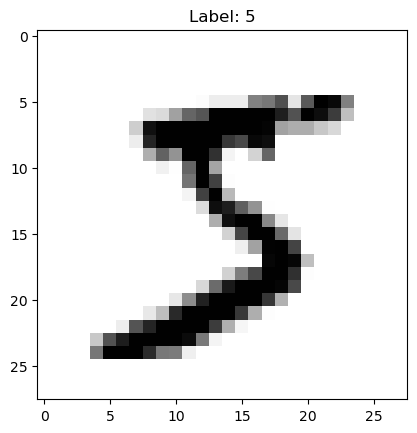

In [ ]:
#displaying some training images
import matplotlib.pyplot as plt
plt.imshow(train_images[0].reshape(28,28), cmap=plt.cm.binary)
plt.title(f"Label: {train_lablels[0]}")
plt.show()